In [1]:
import geopandas
from shapely import wkt
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sizes_lots = pd.read_parquet('../analysis_lots/data/sizes_of_lots.parquet')
nums_lots = pd.read_parquet('../analysis_lots/data/nums_of_lots.parquet')

In [3]:
for i in range(len(nums_lots)):
    if i < (len(nums_lots)/2):
        nums_lots.loc[i,'sign'] = 0
    else:
        nums_lots.loc[i,'sign'] = 1

for i in range(len(sizes_lots)):
    if i < (len(sizes_lots)/2):
        sizes_lots.loc[i,'sign'] = 0
    else:
        sizes_lots.loc[i,'sign'] = 1
nums_lots

,ID,lot_nums,sign
0,130,396,0.0
1,226,379,0.0
2,76,347,0.0
3,92,317,0.0
4,23,314,0.0
...,...,...,...
246,113,1,1.0
247,88,1,1.0
248,120,1,1.0
249,12,1,1.0


In [4]:
nums_PU = pd.read_parquet('../analysis_PU_DO/output_total/PU_total.parquet')
nums_DO = pd.read_parquet('../analysis_PU_DO/output_total/DO_total.parquet')

In [5]:
for i in range(len(nums_DO)):
    if i < (len(nums_DO)/2):
        nums_DO.loc[i,'sign'] = 0
    else:
        nums_DO.loc[i,'sign'] = 1
        
for i in range(len(nums_PU)):
    if i < (len(nums_PU)/2):
        nums_PU.loc[i,'sign'] = 0
    else:
        nums_PU.loc[i,'sign'] = 1

In [6]:
ugly = []
ugly_tot = []
for i in range(len(nums_DO)):
    for j in range(len(nums_lots)):
        if nums_DO['DOLocationID'][i] == nums_lots['ID'][j] :
            a = (int)(nums_DO['sign'][i])
            b = (int)(nums_lots['sign'][j])
            flag = a ^ b
            if flag == 0:
                ugly.append(nums_DO['DOLocationID'][i])
                
ugly_tot += ugly[:5] + ugly[-5:]
ugly = []

for i in range(len(nums_PU)):
    for j in range(len(nums_lots)):
        if nums_PU['PULocationID'][i] == nums_lots['ID'][j] :
            a = (int)(nums_PU['sign'][i])
            b = (int)(nums_lots['sign'][j])
            flag = a ^ b
            if flag == 0:
                ugly.append(nums_PU['PULocationID'][i])
                
ugly_tot += ugly[:5] + ugly[-5:]
ugly = []

for i in range(len(nums_DO)):
    for j in range(len(sizes_lots)):
        if nums_DO['DOLocationID'][i] == sizes_lots['ID'][j] :
            a = (int)(nums_DO['sign'][i])
            b = (int)(sizes_lots['sign'][j])
            flag = a ^ b
            if flag == 0:
                ugly.append(nums_DO['DOLocationID'][i])
                
ugly_tot += ugly[:5] + ugly[-5:]
ugly = []

for i in range(len(nums_PU)):
    for j in range(len(sizes_lots)):
        if nums_PU['PULocationID'][i] == sizes_lots['ID'][j] :
            a = (int)(nums_PU['sign'][i])
            b = (int)(sizes_lots['sign'][j])
            flag = a ^ b
            if flag == 0:
                ugly.append(nums_PU['PULocationID'][i])
        
ugly_tot += ugly[:5] + ugly[-5:]
ugly_tot = list(set(ugly_tot))

In [7]:
taxi_zone = pd.read_csv('../etl_parking_lot/processed_data/taxi_zones.csv')

In [8]:
geometry = taxi_zone['the_geom'].apply(wkt.loads)
taxi_zone = geopandas.GeoDataFrame(taxi_zone, crs="EPSG:4326", geometry=geometry)

In [9]:
ug_ = taxi_zone[taxi_zone['LocationID'].isin(ugly_tot)]

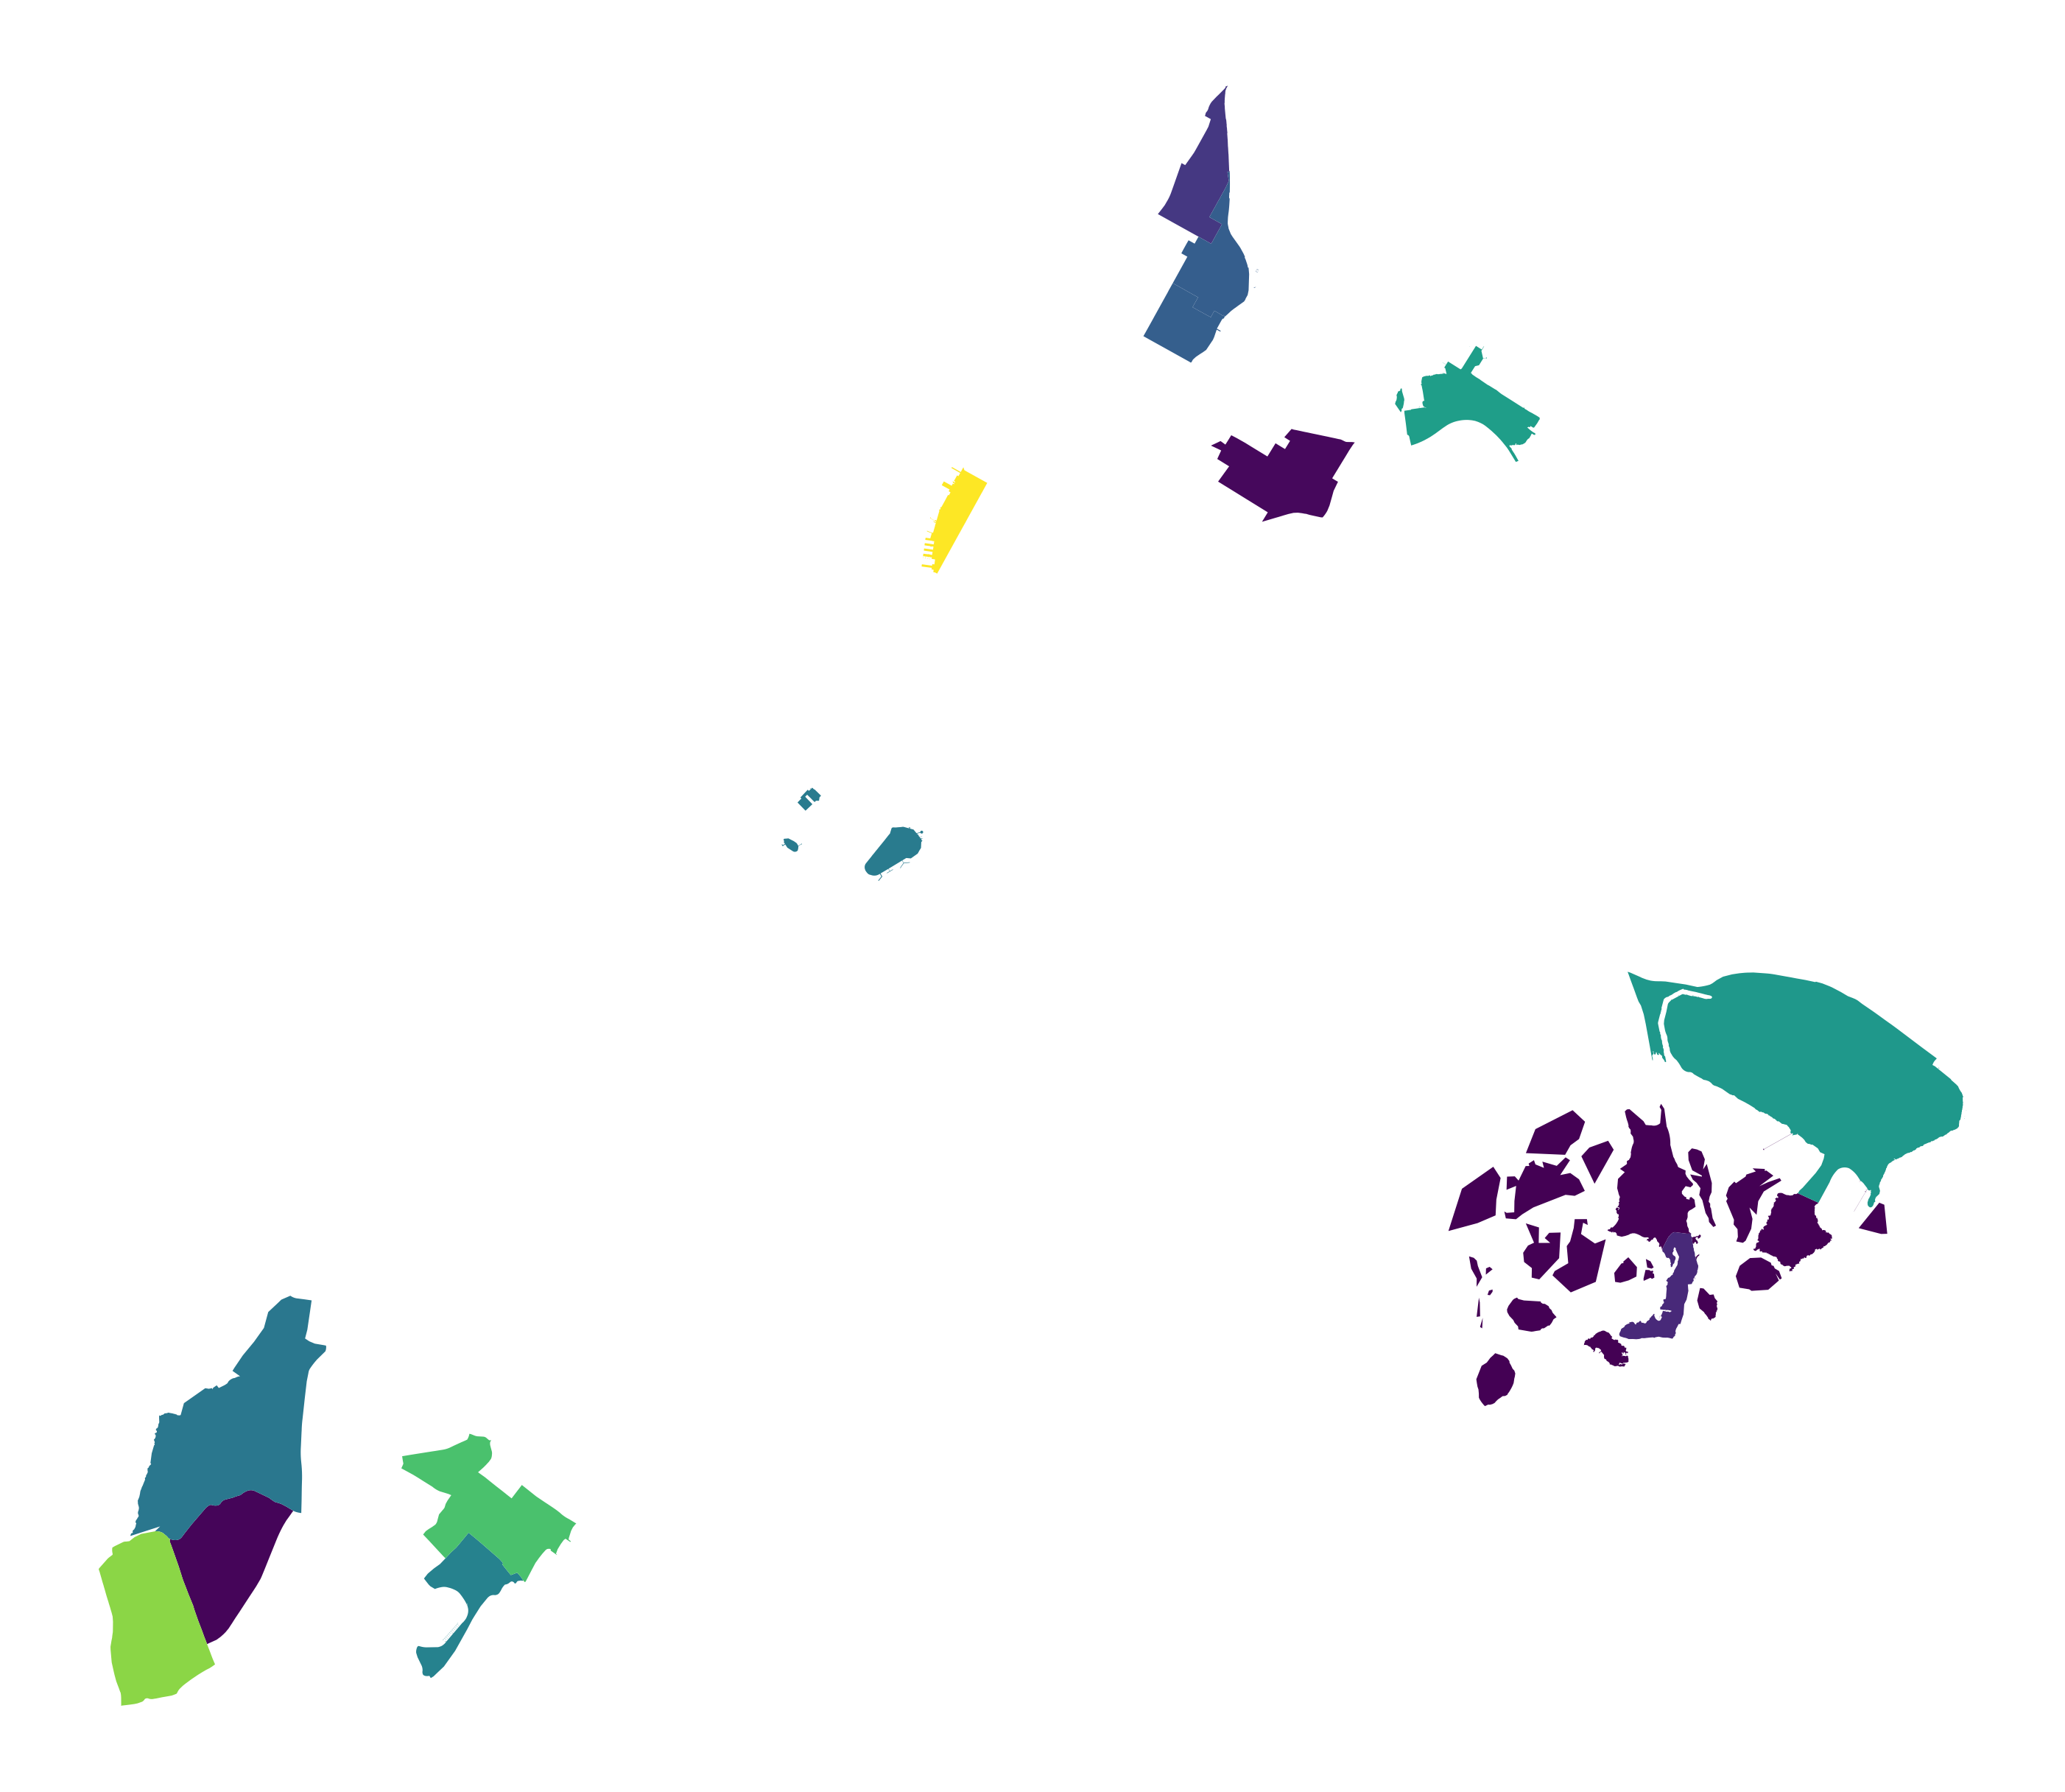

In [10]:
ugg = ug_.plot(column='LocationID',legend=False,figsize=(50,50),alpha=1)
plt.axis('off')
plt.show()

In [11]:
ugg.figure.savefig('counter_example.png',transparent=True)